<a href="https://colab.research.google.com/github/oriidearmstrong/Capstone/blob/main/Research_Code_Oriide_Armstrong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving fish3.xlsx to fish3 (1).xlsx


Model Coefficients:
UTD Feed (kg): 4.306556698678616e-06
Avg Water Temp (°C): -0.06239059599563531
Intercept: 2.5406480276320806
R-squared: 0.2210961120388769


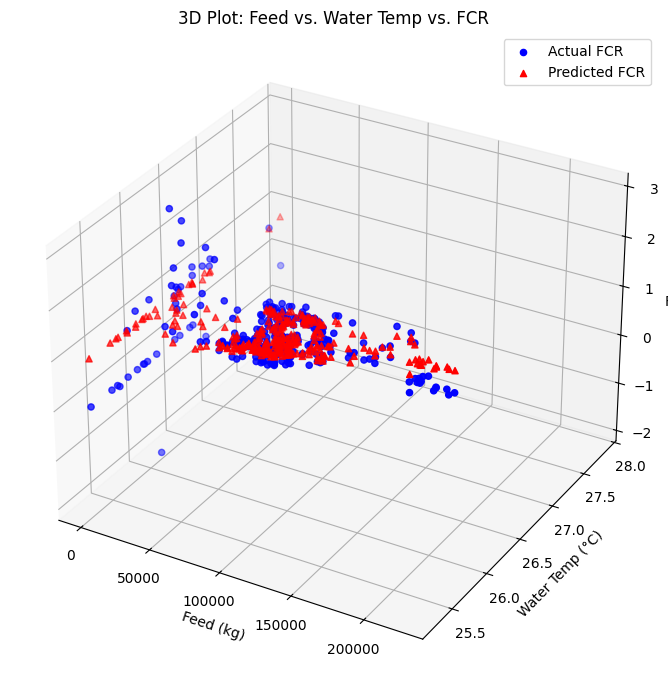

Simulated FCR for Feed = 100000 kg and Temp = 27.5 °C: 1.256


np.float64(1.2555623076199711)

In [ ]:
# Prediction Model using Feed and Water Temperature
# Excel file is located on my desktop

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Load Excel data
file_path = '/content/fish3.xlsx'
df = pd.read_excel(file_path)

# Prepare the dataset
model_data = df[['UTD Feed (kg)', 'LTD Days of Culture', 'Day Degrees', 'UTD Econ. FCR']].copy()
model_data.dropna(inplace=True)
model_data['Avg Water Temp (°C)'] = model_data['Day Degrees'] / model_data['LTD Days of Culture']

# Define features and target
X = model_data[['UTD Feed (kg)', 'Avg Water Temp (°C)']]
y = model_data['UTD Econ. FCR']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)
model_data['Predicted FCR'] = model.predict(X)

# Display model coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X, y))

# Export predictions to Excel
model_data[['UTD Feed (kg)', 'Avg Water Temp (°C)', 'UTD Econ. FCR', 'Predicted FCR']].to_excel("FCR_Model_Output.xlsx", index=False)

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(model_data['UTD Feed (kg)'], model_data['Avg Water Temp (°C)'], model_data['UTD Econ. FCR'],
           c='blue', label='Actual FCR')
ax.scatter(model_data['UTD Feed (kg)'], model_data['Avg Water Temp (°C)'], model_data['Predicted FCR'],
           c='red', marker='^', label='Predicted FCR')
ax.set_xlabel('Feed (kg)')
ax.set_ylabel('Water Temp (°C)')
ax.set_zlabel('FCR')
ax.set_title('3D Plot: Feed vs. Water Temp vs. FCR')
ax.legend()
plt.tight_layout()
plt.show()

# Secondary Check
def simulate_fcr(feed_kg, temperature_c):
    fcr = model.intercept_ + model.coef_[0] * feed_kg + model.coef_[1] * temperature_c
    print(f"Simulated FCR for Feed = {feed_kg} kg and Temp = {temperature_c} °C: {fcr:.3f}")
    return fcr

# Check
simulate_fcr(100000, 27.5)

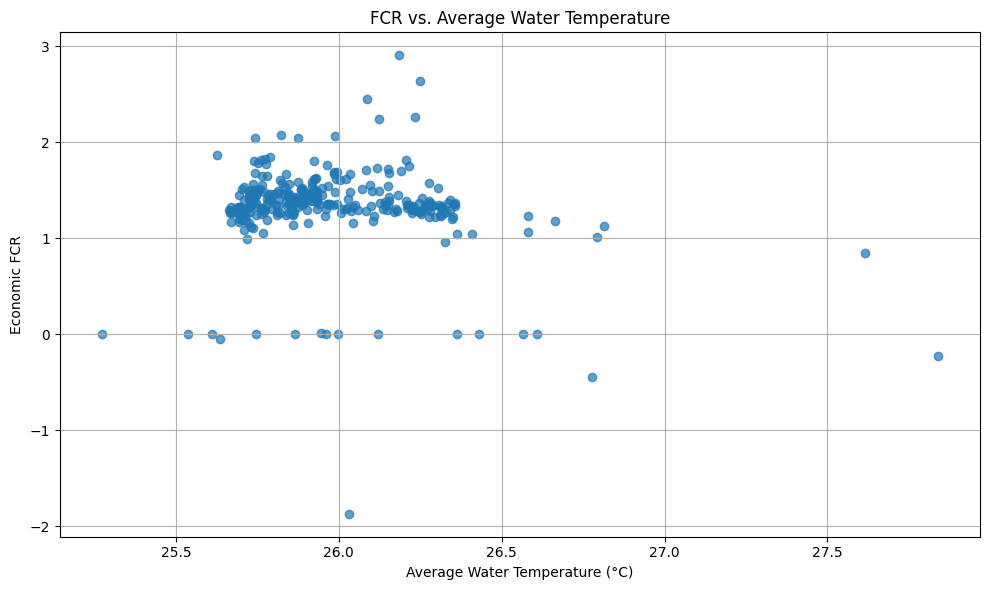

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Avg Water Temp vs UTD Econ. FCR
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Avg Water Temp (°C)'], df_filtered['UTD Econ. FCR'], alpha=0.7)
plt.title('FCR vs. Average Water Temperature')
plt.xlabel('Average Water Temperature (°C)')
plt.ylabel('Economic FCR')
plt.grid(True)
plt.tight_layout()
plt.show()

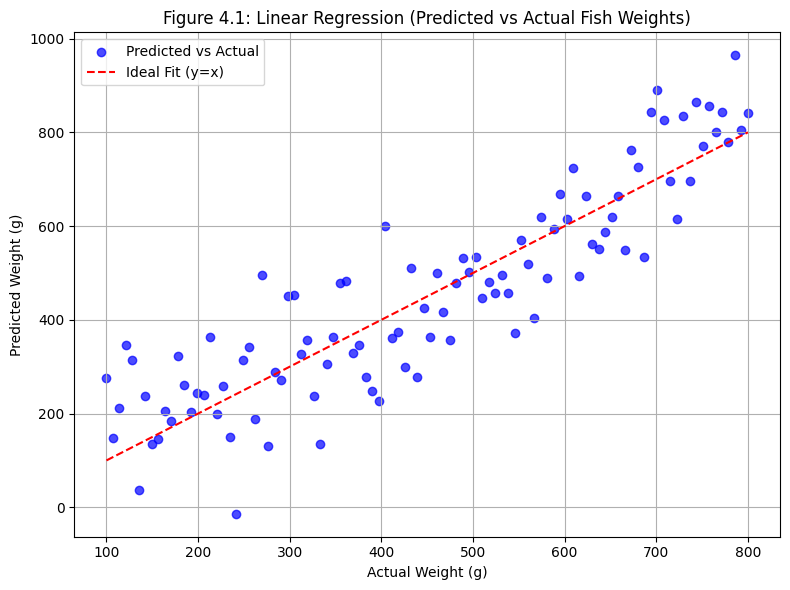

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulate sample data for actual and predicted fish weights using linear regression
np.random.seed(0)
actual_weights = np.linspace(100, 800, 100)
predicted_weights = actual_weights + np.random.normal(0, 100, size=100)

# Create a DataFrame for display and plotting
df = pd.DataFrame({
    'Actual Weight (g)': actual_weights,
    'Predicted Weight (g)': predicted_weights
})

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Actual Weight (g)'], df['Predicted Weight (g)'], alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([100, 800], [100, 800], 'r--', label='Ideal Fit (y=x)')
plt.title('Figure 4.1: Linear Regression (Predicted vs Actual Fish Weights)')
plt.xlabel('Actual Weight (g)')
plt.ylabel('Predicted Weight (g)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


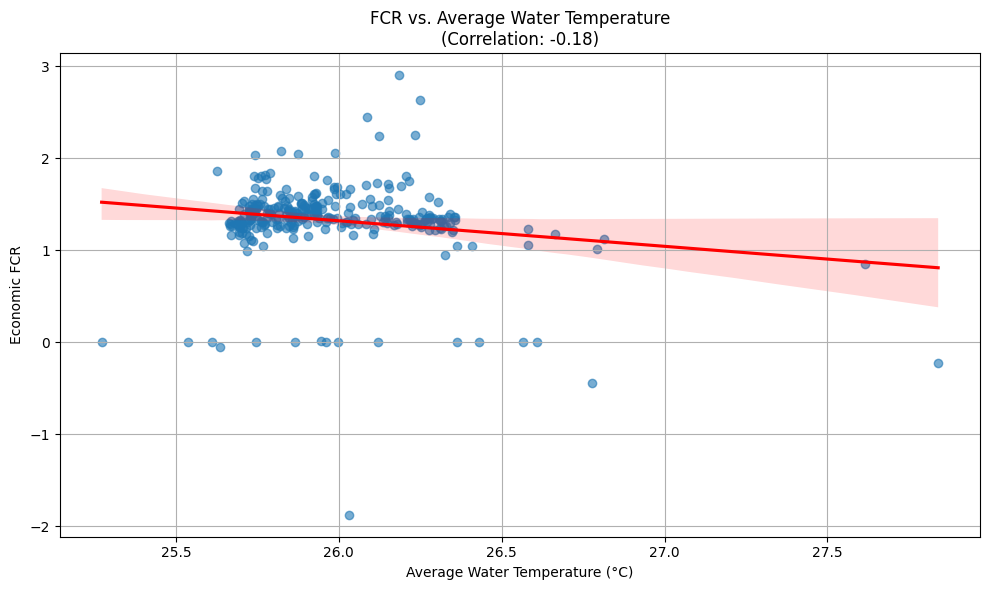

In [ ]:
import numpy as np
import seaborn as sns

# Perform linear regression
x = df_filtered['Avg Water Temp (°C)']
y = df_filtered['UTD Econ. FCR']
slope, intercept = np.polyfit(x, y, 1)
trend_line = slope * x + intercept
correlation = np.corrcoef(x, y)[0, 1]

# Plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title(f'FCR vs. Average Water Temperature\n(Correlation: {correlation:.2f})')
plt.xlabel('Average Water Temperature (°C)')
plt.ylabel('Economic FCR')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data for modeling
model_data = df[['UTD Feed (kg)', 'LTD Days of Culture', 'Day Degrees', 'UTD Econ. FCR']].copy()
model_data.dropna(inplace=True)

# Compute average temperature again
model_data['Avg Water Temp (°C)'] = model_data['Day Degrees'] / model_data['LTD Days of Culture']

# Define features (X) and target (y)
X = model_data[['UTD Feed (kg)', 'Avg Water Temp (°C)']]
y = model_data['UTD Econ. FCR']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Retrieve model coefficients
coefficients = dict(zip(X.columns, model.coef_))
intercept = model.intercept_
r_squared = model.score(X, y)

(coefficients, intercept, r_squared)


({'UTD Feed (kg)': np.float64(4.306556698678616e-06),
  'Avg Water Temp (°C)': np.float64(-0.06239059599563531)},
 np.float64(2.5406480276320806),
 0.2210961120388769)

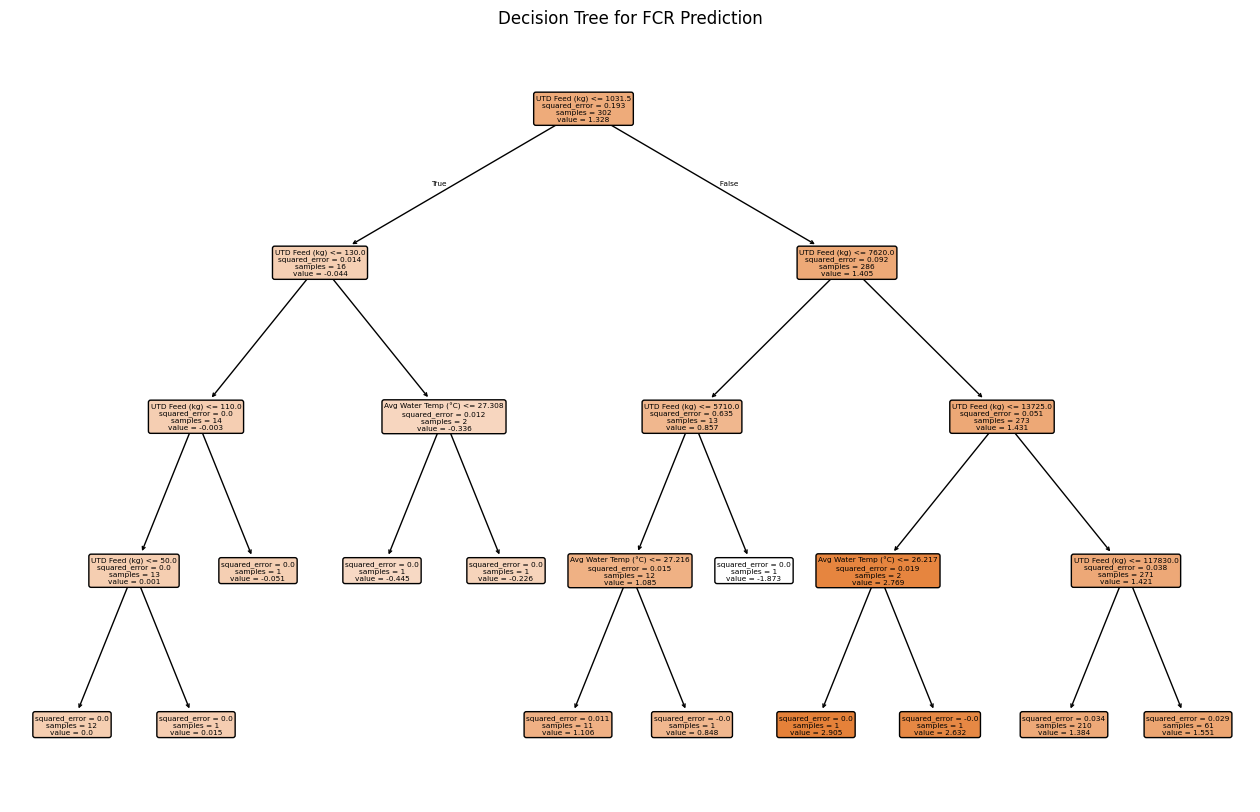

'|--- UTD Feed (kg) <= 1031.50\n|   |--- UTD Feed (kg) <= 130.00\n|   |   |--- UTD Feed (kg) <= 110.00\n|   |   |   |--- UTD Feed (kg) <= 50.00\n|   |   |   |   |--- value: [0.00]\n|   |   |   |--- UTD Feed (kg) >  50.00\n|   |   |   |   |--- value: [0.02]\n|   |   |--- UTD Feed (kg) >  110.00\n|   |   |   |--- value: [-0.05]\n|   |--- UTD Feed (kg) >  130.00\n|   |   |--- Avg Water Temp (°C) <= 27.31\n|   |   |   |--- value: [-0.45]\n|   |   |--- Avg Water Temp (°C) >  27.31\n|   |   |   |--- value: [-0.23]\n|--- UTD Feed (kg) >  1031.50\n|   |--- UTD Feed (kg) <= 7620.00\n|   |   |--- UTD Feed (kg) <= 5710.00\n|   |   |   |--- Avg Water Temp (°C) <= 27.22\n|   |   |   |   |--- value: [1.11]\n|   |   |   |--- Avg Water Temp (°C) >  27.22\n|   |   |   |   |--- value: [0.85]\n|   |   |--- UTD Feed (kg) >  5710.00\n|   |   |   |--- value: [-1.87]\n|   |--- UTD Feed (kg) >  7620.00\n|   |   |--- UTD Feed (kg) <= 13725.00\n|   |   |   |--- Avg Water Temp (°C) <= 26.22\n|   |   |   |   |---

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

# Train a Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X, y)

# Export text version of the tree
tree_rules = export_text(tree_model, feature_names=list(X.columns))

# Plot the decision tree
plt.figure(figsize=(16, 10))
plot_tree(tree_model, feature_names=list(X.columns), filled=True, rounded=True)
plt.title("Decision Tree for FCR Prediction")
plt.show()

tree_rules
